# **Churn Analysis: Telco Customer Retention**
### **By : Radif Ramadan (JCDSOL-014)**

# **Business Understanding**

**Context**  
Perusahaan telekomunikasi ingin memahami mengapa beberapa pelanggan memutuskan untuk tidak melanjutkan langganan layanan internet mereka. Analisis Churn untuk Telco ini bertujuan untuk dalam mengambil tindakan preventif untuk mencegah pelanggan berhenti berlangganan, serta mengidentifikasi faktor-faktor yang menyebabkan pelanggan berhenti menggunakan layanan mereka, sehingga perusahaan dapat menjaga hubungan dengan pelanggan dan mempertahankan pendapatan yang ada. Mengingat biaya yang dikeluarkan untuk mempertahankan pelanggan lama tidak sebanyak biaya untuk menambah pelanggan baru


**Variabel Target (Churn) :**

`1` : Pelanggan tidak melanjutkan layanan internet (Yes) --> Positive

`0` : Pelanggan tetap menggunakan layanan internet (No) --> Negative

**Problem Statement :**

ustri telekomunikasi berada pada persaingan yang sangat kompetitif. Mempertahankan pelanggan menjadi krusial, tapi juga sangat menantang. Kehilangan kontrol atas loyalitas pelanggan sama saja kehilangan peluang untuk tumbuh dan mendapatkan keuntungan. Semua provider telekomunikasi saat ini berlomba-lomba untuk menambah jumlah pelanggan, namun tantangannya adalah pelanggan yang churn dan pindah ke kompetitor karena alasan seperti kualitas layanan, harga, atau customer service yang lebih baik. Penawaran spesial saja sudah tidak cukup untuk pelanggan yang sudah berencana untuk churn. Ditambah lagi, provider telekomunikasi harus terus berinvestasi besar dalam infrastruktur untuk tetap bisa memberikan layanan yang bagus kepada pelanggan.

Mengingat tantangan-tantangan diatas, jelas bahwa kehilangan pelanggan atau pergantian pelanggan **(Churn)** bisa berdampak besar pada berbagai aspek perusahaan, terutama dari segi keuangan. Jika saja pelanggan memutuskan untuk Churn atau mengakhiri kontrak, hal itu secara langsung mengakibatkan kerugian finansial bagi perusahaan. Baik dari segi cost ataupun pendapatan.

**Goals :**

Berdasarkan permasalahan diatas, perusahaan perlu mengidentifikasi kemungkinan pelanggan akan churn atau tidak. Dengan cara ini, perusahaan bisa mempersiapkan strategi retensi untuk pelanggan yang berisiko Churn.

Selain itu, perusahaan juga perlu memahami karakteristik dan faktor apa saja yang membuat pelanggan berpotensi churn, sehingga perusahaan dapat mengambil langkah-langkah preventif untuk mencegah churn dan mempertahankan pelanggan yang sudah ada.


**Analytic Approach :**

Analisis yang akan dilakukan adalah menemukan pola yang mengakibatkan pelanggan Churn dan yang tidak Churn. Selanjutnya menerapkan model Machine Learning untuk membangun model yang dapat mengklasifikasikan pelanggan Churn atau Tidak, sehingga membantu perusahaan dalam memprediksi kemungkinan pelanggan yang akan Churn

**Metric Evaluation :**

`Type 1 error : False Positive` --> Resiko nya biaya marketing yang sia-sia.

`Type 2 error : False Negative` --> Resiko nya kehilangan pelanggan

Berdasarkan konsekuensinya, `False Negative` memiliki dampak yang lebih merugikan dibandingkan dengan `False Positive`. **Hal ini disebabkan oleh biaya yang lebih tinggi untuk mendapatkan pelanggan baru**. Di sektor telekomunikasi, menjaga pelanggan yang ada lebih ekonomis dibandingkan dengan mencari pelanggan baru, karena pelanggan yang ada sudah familiar dengan layanan dan produk perusahaan. Oleh karena itu, penting untuk meminimalkan kesalahan `False Negative` untuk mengurangi churn dan mengoptimalkan biaya operasional.

In [314]:
import pandas as pd
import numpy as np

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc

# Associaton Nominal
from dython.nominal import associations

# Train-Test split and CrossVal
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import OneHotEncoder


# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Transfrom & One-Hot Encoding
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder, BinaryEncoder


# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metrics Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

# Handling Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# **Data Understanding**

In [249]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## **Data Description**

- **Dependents**: Whether the customer has dependents or not.
- **Tenure**: Number of months the customer has stayed with the company.
- **OnlineSecurity**: Whether the customer has online security or not.
- **OnlineBackup**: Whether the customer has online backup or not.
- **InternetService**: Whether the client is subscribed to Internet service.
- **DeviceProtection**: Whether the client has device protection or not.
- **TechSupport**: Whether the client has tech support or not
- **Contract**: Type of contract according to duration.
- **PaperlessBilling**: Bills issued in paperless form.
- **MonthlyCharges**: Amount of charge for service on monthly bases.
- **Churn**: Whether the customer churns or not.

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [251]:
# Looping untuk mengambil nilai unik dari setiap kolom

pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel_desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Total Unique', 'Sampel Unique'],
                     data=listItem)
tabel_desc

,Nama Kolom,Jumlah Total Unique,Sampel Unique
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63..."
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35..."


## **Checking Missing Value**

In [252]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dari pengecekan Missing Value, tidak ditemukan nya data yang kosong. Dapat disimpulkan data yang didapatkan bersih dari "missing Value"

## **Checking Outliers**

In [253]:
df_numeric = df.select_dtypes(include=['number'])

fig = go.Figure()

for col in df_numeric.columns:
    fig.add_trace(go.Box(
        y=df_numeric[col],
        name=col,
        boxpoints='outliers'
    ))

fig.update_layout(
    title="Boxplot for Numerik Values",
    yaxis_title="Nilai",
    boxmode='group' 
)

fig.show()

Dari pengecekan Outliers, tidak ditemukan nya data yang kosong. Dapat disimpulkan data yang didapatkan bersih dari "Outliers"

## **Checking Duplicates**

In [254]:
tabel_desc

,Nama Kolom,Jumlah Total Unique,Sampel Unique
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63..."
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35..."


Dari Tabel Description di atas, terdapat beberapa kolom yang memiliki jumlah nilai unik yang sedikit. Nilai unik yang sedikit ini mungkin terdeteksi sebagai duplikat. Namun, mereka bukan duplikat dalam arti tradisional, melainkan merupakan representasi dari kategori yang berbeda dalam dataset tersebut.

# **Exploratory Data Analysis**

### **Churn Label**

In [255]:
churn_plot = df['Churn'].value_counts().reset_index()
churn_plot.columns = ['Churn', 'Count']
churn_plot

,Churn,Count
0,No,3614
1,Yes,1316


In [315]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'bar'}]],
    subplot_titles=("Pie Chart", "Bar Plot")
)

fig.add_trace(
    px.pie(
        churn_plot,
        values='Count',
        names='Churn',
        color='Churn',
        color_discrete_sequence=px.colors.qualitative.Set2
    ).data[0],
    row=1, col=1
)

# Bar plot
fig.add_trace(
    go.Bar(
        x=churn_plot['Churn'],
        y=churn_plot['Count'],
        marker=dict(color=px.colors.qualitative.Set2)
    ),
    row=1, col=2
)

# Menampilkan plot
fig.update_layout(title_text="Churn Analysis")
fig.show()

- Dilihat dari pie chart diatas, bahwa jumlah customer yang melakukan **churn** (berhenti langganan) sebesar **26,7%**. Sedangkan jumlah customer yang **tidak melakukan churn** (berlangganan) sebesar **73,3%**.

### **Impact of Service on Churn Rate**

Sebelumnya kita akan mengecek terlebih dahulu data-data dari `InternetService` yang memiliki nilai `'No'`

In [316]:
df[df.InternetService == 'No'].head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,TenureDuration
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0,< 1 Tahun
6,No,17,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.70,0,1 - 2 Tahun
15,Yes,13,No internet service,No internet service,No,No internet service,No internet service,One year,No,20.00,0,1 - 2 Tahun
22,Yes,34,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.65,0,2 - 3 Tahun
26,No,15,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.45,0,1 - 2 Tahun


- Terlihat bahwa ketika pelanggan yang tidak menggunakan layanan `InternetService`, maka layanan lainnya akan berstatus `No Internet Service`. **Artinya, setiap pelanggan yang tidak menggunakan layanan internet juga tidak akan menggunakan layanan lain dari provider** (perusahaan telco). Hal ini memungkinkan bahwa mereka hanya menggunakan **layanan televisi atau telepon kabel saja tanpa internet**

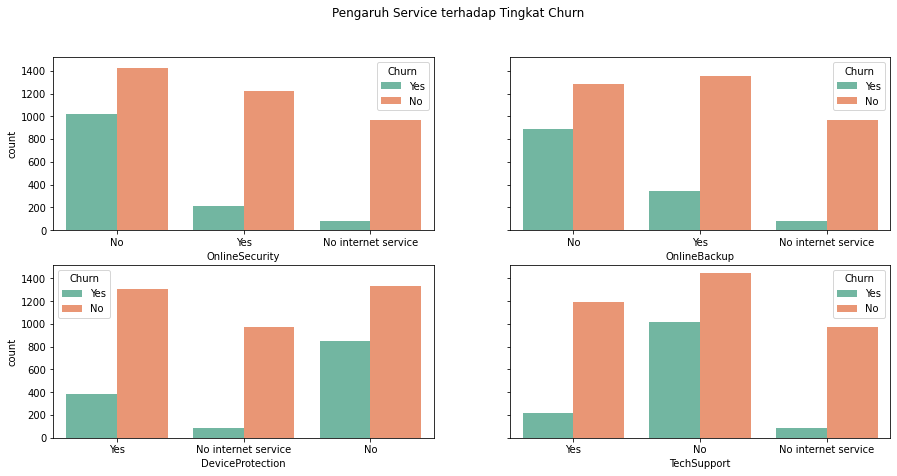

In [258]:
fig, axes = plt.subplots(2,2, figsize = (15,7), sharey = True)
plt.suptitle("Pengaruh Service terhadap Tingkat Churn")

sns.countplot(x = "OnlineSecurity", data = df, hue = "Churn", ax=axes[0,0], palette="Set2")
sns.countplot(x = "OnlineBackup", data = df, hue = "Churn", ax=axes[0,1], palette="Set2")
sns.countplot(x = "DeviceProtection", data = df, hue = "Churn", ax=axes[1,0],palette="Set2")
sns.countplot(x = "TechSupport", data = df, hue = "Churn", ax=axes[1,1], palette="Set2")

plt.show()

* Penggunaan layanan tampaknya memiliki pengaruh terhadap tingkat churn. Tingkat churn yang signifikan menunjukkan **bahwa pelanggan cenderung memutuskan untuk tetap berlangganan atau tidak berdasarkan apakah mereka menggunakan layanan tersebut atau tidak**.

* Adapun pelanggan dengan Service `No internet service` menunjukkan kecenderungan **tidak melakukan Churn**, artinya pelanggan yang hanya menggunakan layanan televisi atau telepon kabel cenderung jarang churn. Hal ini mungkin karena mereka puas dengan layanan tersebut, tidak mengalami masalah yang sering terjadi pada layanan internet, dan merasa **layanan ini lebih terjangkau harganya dan stabil**. Dengan kata lain, tingkat churn yang rendah menunjukkan kepuasan dan loyalitas yang tinggi terhadap penyedia layanan.



### **Churn Rate Density by Tenure**

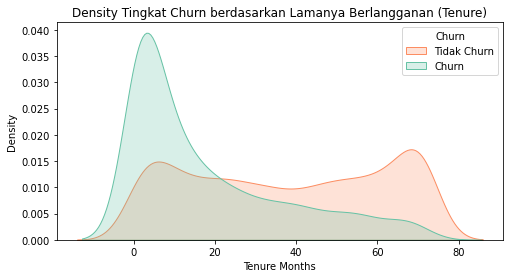

In [259]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="tenure", hue="Churn", common_norm=False, fill=True, palette="Set2")
plt.title("Density Tingkat Churn berdasarkan Lamanya Berlangganan (Tenure)")
plt.xlabel("Tenure Months")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["Tidak Churn", "Churn"])
plt.show()

*   Tingkat churn cenderung lebih tinggi pada awal langganan (Tenure rendah) dan kemudian mengalami penurunan seiring dengan berjalannya waktu. Hal ini menunjukkan bahwa pelanggan yang baru bergabung cenderung memiliki tingkat kemungkinan churn yang lebih tinggi.

*   Sedangkan customer yang telah berlangganan lebih lama cenderung lebih stabil dalam menggunakan layanan provider.

**Oleh karena itu, dapat disimpulkan bahwa lamanya customer berlangganan memiliki pengaruh signifikan terhadap tingkat churn dalam perusahaan tersebut.**

### **Churn Rate Density by MonthlyCharges**

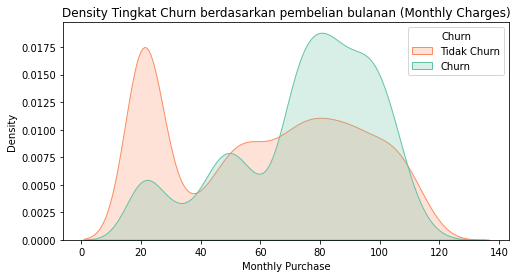

In [260]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", common_norm=False, fill=True, palette="Set2")
plt.title("Density Tingkat Churn berdasarkan pembelian bulanan (Monthly Charges)")
plt.xlabel("Monthly Purchase")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["Tidak Churn", "Churn"])

- Pelanggan dengan transaksi bulanan di atas $60 cenderung **lebih tinggi kemungkinan untuk churn** dibandingkan dengan pelanggan dengan transaksi bulanan di bawah $60.

### **Distribution Between TenureDuration and Churn Rate**

Buat kolom kategori baru `TenureDuration` dengan durasi-durasi `Tenure` sebagai berikut:

In [261]:
def categorize_tenure(tenure):
    if 1 <= tenure <= 11:
        return '< 1 Tahun'
    elif 12 <= tenure <= 23:
        return '1 - 2 Tahun'
    elif 24 <= tenure <= 36:
        return '2 - 3 Tahun'
    else:
        return '> 3 Tahun'
    # Tambahkan kategori lain jika diperlukan

# Buat kolom baru 'contract_type' berdasarkan 'tenure_month'
df['TenureDuration'] = df['tenure'].apply(categorize_tenure)
df['TenureDuration'].value_counts().reset_index()

,TenureDuration,count
0,> 3 Tahun,2109
1,< 1 Tahun,1444
2,1 - 2 Tahun,726
3,2 - 3 Tahun,651


In [262]:

contract_churn_count = df.groupby(['TenureDuration', 'Churn']).size().reset_index(name='Count')

# Membuat plot menggunakan Plotly
fig = px.bar(contract_churn_count, x='TenureDuration', y='Count', color='Churn', 
             color_discrete_sequence=pc.qualitative.Set2, 
             title="Distribusi Antara TenureDuration Dengan Tingkat Churn",
             category_orders={'TenureDuration': ['< 1 Tahun', '1 - 2 Tahun', '2 - 3 Tahun', '> 3 Tahun']})

fig.update_layout(
    xaxis_title="Lama Berlangganan",
    yaxis_title="Count",
    title_font_size=15,
    xaxis_tickfont_size=11
)

fig.show()

- Pelanggan dengan `TenureDuration` yang kurang dari 1 tahun memiliki **tingkat churn yang seimbang dengan yang tidak churn** , mungkin karna pelanggan sedang melakukan uji coba layanan provider
- Tetapi pelanggan dengan `TenureDuration` lebih dari 3 tahun memeliki **tingkat churn yang terbilang sangat rendah**, mungkin pelanggan sudah loyal dengan layanan provider

**Hal ini menunjukkan loyalitas pelanggan dapat mempengaruhi tingkat churn**

### **Distribution Between Contract and Churn Rate**

In [263]:
contract_churn_count = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')

# Membuat plot menggunakan Plotly
fig = px.bar(contract_churn_count, x='Contract', y='Count', color='Churn', 
             color_discrete_sequence=pc.qualitative.Set2, 
             title="Distribusi Antara Contract Dengan Tingkat Churn",)

fig.update_layout(
    xaxis_title="Contract",
    yaxis_title="Count",
    title_font_size=15,
    xaxis_tickfont_size=11
)

fig.show()

- Pelanggan dengan `Contract` bulanan memiliki  **tingkat churn yang seimbang dengan yang tidak churn** , mungkin hal ini sama juga dikarenakan pelanggan sedang melakukan uji coba layanan provider
- Tetapi pelanggan dengan `Contract` tahunan dan dua tahunan memiliki **tingkat churn yang terbilang sangat rendah**, mungkin hal ini sama juga dikarenakan pelanggan sudah loyal dengan layanan provider

**Hal ini menunjukkan lama kontrak pelanggan dapat mempengaruhi tingkat churn**

### **Distribution Between Internet Service Vs Churn Rate**

In [264]:
count_data = df.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')

fig = px.bar(count_data, x='InternetService', y='Count', color='Churn',
             color_discrete_sequence=pc.qualitative.Set2,
             title="Hubungan Antara 'Internet Service' Dengan Tingkat Churn")

fig.update_layout(
    xaxis_title="InternetService",
    yaxis_title="Count",
    title_font_size=15,
    xaxis_title_font_size=11,
    yaxis_title_font_size=11,
    xaxis_tickfont_size=11
)

fig.show()

Terbukti bahwa pelanggan dengan `InternetService` = `No`cenderung lebih loyal. Di sisi lain, pelanggan yang menggunakan `InternetService` = `DSL` menunjukkan tingkat loyalitas yang tinggi. Namun, pelanggan dengan `InternetService` = `Fiber Optic` memiliki tingkat churn yang hampir seimbang dengan tingkat pelanggan yang tidak churn. Ini menunjukkan bahwa meskipun Fiber Optic memiliki banyak pelanggan, ada ketidakstabilan dalam loyalitas pelanggan.

# **Data Cleaning**

Pada Proses ini tidak dilakukan Cleaning karna Data sudah bersih dari missing value, duplicate dan outliers

# **Data Preparation**

### **Feature Selection**

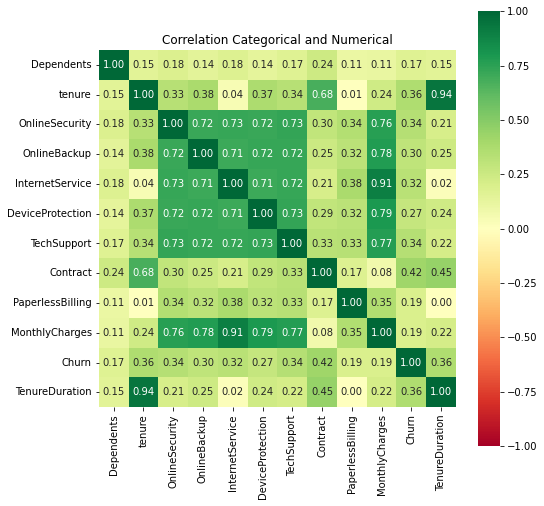

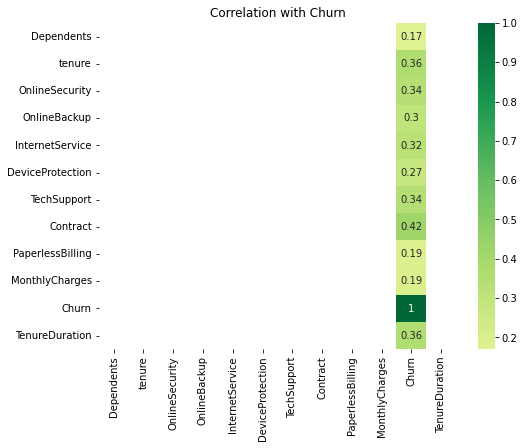

In [265]:
# Drop telebih Dahulu kolom `TenureDuration`
complete_correlation = associations(
    df,
    cmap='RdYlGn',
    title='Correlation Categorical and Numerical',
    figsize=(8,8),
    annot=True
)

correlation_matrix = complete_correlation['corr']

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[:, correlation_matrix.columns.get_loc('Churn')] = True
masked_correlation = np.where(mask, correlation_matrix, np.nan)

plt.figure(figsize=(8, 6))
sns.heatmap(masked_correlation, annot=True, cmap='RdYlGn', cbar=True, center=0,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.index)
plt.title('Correlation with Churn')
plt.show()

Terlihat hasil Korelasi menggunakan `Dython.Nominal` didapatkan ada 7 variabel yang memiliki korelasi yang cukup kuat dengan Tingkat Churn diantaranya
`Tenure,TenureDuration, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract`. Dari hasil korelasi ini akan kita gunakan sebagai **Feature Selection**

**Definisikan Kolom Target**

`Yes` -->  1 --> Positive

`No` -->  0 --> Negative

In [266]:
# Setting Variabel Target menjadi 1 dan 0
# Ubah variabel Churn menjadi 1 = Yes dan 0 = No

df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [267]:
# Drop kolom yang tidak digunakan dan memiliki korelasi rendah dan variabel target

x = df.drop(columns=['Churn','PaperlessBilling','Dependents','tenure'])
y = df['Churn']

**Drop kolom**

- `PaperlessBilling` Karna memiliki korelasi rendah, dan secara Domain Knowledge kolom ini tidak relevan karna hanya memberikan informasi apakah tagihan dibuat secara Paperless atau tidak. Hal ini juga di kuatkan dengan nilai korelasi yang rendah.
- `Dependents` dengan alasan korelasi yang rendah dengan kolom target
- `tenure` dan menggunakan `TenureDuration` yang berbentuk kategoti interval untuk memudahkan interpretasi data juga efisiensi model, hal ini dikuatkan dengan nilai korelasi yang sama dengan fitur `tenure`

### **Feature Transfrom**

Pada tahap ini akan dilakukan Transform data berdasarkan kebutuhan kategorikal yang ada pada dataset:
- Pada kolom `['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport']` diberlakukan OneHotEncoder mengingat data tersebut bersifat kategorikal nominal
- Pada kolom `['TenureDuration, 'Contract'']` diberlakukan OrdinalEncoder mengingat data bersifat kategorikal interval yang memiliki urutan, lalu dilakukan MinMaxScaller
- Selanjutnya `['MonthlyCharges']` diberlakukan MinMaxScaler karna data tersebut bersifat numerik dan mengingat dominan data berukuran 0-1, serta tidak adanya Outlier pada data. maka MinMax lebih cocok digunakan

In [268]:
ordinal_mapping = [{'col':'TenureDuration', 'mapping':{'< 1 Tahun':0,
                                       '1 - 2 Tahun':1,
                                       '2 - 3 Tahun':2,
                                       '> 3 Tahun':3}}]

ordinal_mapping2 = [{'col':'Contract', 'mapping':{'Month-to-month':0,
                                       'One year':1,
                                       'Two year':2}}]


pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['TenureDuration',], mapping=ordinal_mapping)),
    ('min_max_scaler', MinMaxScaler())
])

pipe_ordinal_scale2 = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract'], mapping=ordinal_mapping2)),
    ('min_max_scaler', MinMaxScaler())
])

transform = ColumnTransformer(transformers=[('encoders', OneHotEncoder(drop='first'), ['OnlineSecurity', 'OnlineBackup', 
            'InternetService', 'DeviceProtection', 'TechSupport']), 
            ('pipe_ordinal_scale2', pipe_ordinal_scale2, ['Contract']),
            ('pipe_ordinal_scale', pipe_ordinal_scale, ['TenureDuration']),
            ('minmax', MinMaxScaler(), ['MonthlyCharges'])],
             remainder='passthrough')
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoders', OneHotEncoder(drop='first'),
                                 ['OnlineSecurity', 'OnlineBackup',
                                  'InternetService', 'DeviceProtection',
                                  'TechSupport']),
                                ('pipe_ordinal_scale2',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Tw...
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Contract']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['TenureDuration'],
                                                                 mapping=[{'col': 'TenureDuration',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': < 1 Tahun      0
1 - 2 Tahun    1
2 - 3 Tahun    2
> 3 Tahun      3
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['TenureDuration']),
                                ('minmax', MinMaxScaler(), ['MonthlyCharges'])])

In [269]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=1811)

In [270]:
testing = pd.DataFrame(transform.fit_transform(X_train),columns=transform.get_feature_names_out())
testing.head()

,encoders__OnlineSecurity_No internet service,encoders__OnlineSecurity_Yes,encoders__OnlineBackup_No internet service,encoders__OnlineBackup_Yes,encoders__InternetService_Fiber optic,encoders__InternetService_No,encoders__DeviceProtection_No internet service,encoders__DeviceProtection_Yes,encoders__TechSupport_No internet service,encoders__TechSupport_Yes,pipe_ordinal_scale2__Contract,pipe_ordinal_scale__TenureDuration,minmax__MonthlyCharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.562844
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.5,1.000000,0.858788
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.206309
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.548322
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.178768


# **Modelling**

### **Model Benchmarking: K-Fold with Imbalance Treatment**

In [272]:
# Models
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

# Imbalance Treatment
ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)
near = NearMiss()


models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Light GBM': lgbm,
}


resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Metrics Classification
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}


test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

model_bench

[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901
[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 13
[LightGBM] [Info] [binary:Bo

,model,resample,accuracy,precision,recall,F1
0,Logistic Regression,none,69.782936,64.611903,49.389754,55.972225
1,Decision Tree,none,64.657524,49.346228,46.817423,48.035151
2,XGBoost,none,68.652302,58.044617,50.621981,54.059417
3,Random Forest,none,65.320135,51.054200,47.104942,48.979025
4,Light GBM,none,69.222577,60.810200,50.240578,55.016641
5,Logistic Regression,ros,75.751639,50.658568,79.867299,61.979351
6,Decision Tree,ros,65.334870,48.122084,50.524938,49.286366
7,XGBoost,ros,72.790345,52.226267,68.375987,59.200972
8,Random Forest,ros,66.033986,49.140669,51.472805,50.261028
9,Light GBM,ros,73.392669,51.399878,71.414128,59.749660


Secara keseluruhan, teknik Resampling (Imbalance Data) seperti `RandomOverSampling` dan `RandomUnderSampling` terbukti efektif dalam meningkatkan kemampuan model mendeteksi kelas minoritas dibandingkan tanpa menggunakan teknik Resampling. Hal ini dapat terlihat dari hasil **Metrics yang mengalami *Perubahan Signifikan***

In [273]:
# Top 5 Models by Recall
top_model = model_bench.sort_values(by='recall', ascending=False).head()
top_model

,model,resample,accuracy,precision,recall,F1
5,Logistic Regression,ros,75.751639,50.658568,79.867299,61.979351
15,Logistic Regression,smote,75.755442,50.719436,79.771158,61.997932
10,Logistic Regression,rus,75.500210,50.336479,79.675920,61.675697
14,Light GBM,rus,73.674064,48.697292,76.923042,59.611764
12,XGBoost,rus,72.905141,48.098345,75.592868,58.749923


**`Recall Method`**

Selanjutnya Benchamarking Model dilakukan menggunakan metode **Evaluation berdasarkan Recall nya**, dimana kami mengurangi sebanyak-banyak (False Negative) yang terjadi. Hal ini dikarenakan , jika Recall rendah menunjukkan banyak pelanggan yang berhenti berlangganan tidak terdeteksi oleh model, yang berarti kehilangan peluang untuk tindakan retensi dan juga pendapatan. **Mengingat bahwa biaya mendapatkan pelanggan baru seringkali lebih tinggi dibandingkan dengan mempertahankan pelanggan yang sudah ada, memaksimalkan recall menjadi bagian penting dari strategi retensi pelanggan.**

`Recall` --> mengukur proporsi pelanggan yang benar-benar berhenti berlangganan dan berhasil diidentifikasi oleh model. Ini memberikan gambaran tentang seberapa baik model dalam mendeteksi pelanggan yang berisiko tinggi untuk churn.

Dengan recall yang tinggi, perusahaan memiliki kesempatan untuk mengambil tindakan preventif untuk mencegah pelanggan berhenti berlangganan. Hal ini membantu menjaga hubungan dengan pelanggan dan mempertahankan pendapatan yang ada, sehingga membuat model prediksi churn menjadi alat yang berharga untuk membuat strategi retensi pelanggan.

### **Best Models**

In [274]:
# Sorting for highest Recall
top_recall_per_model = model_bench.loc[model_bench.groupby('model')['recall'].idxmax()]
top_recall_per_model = top_recall_per_model.sort_values(by='recall', ascending=False)
top_recall_per_model

,model,resample,accuracy,precision,recall,F1
5,Logistic Regression,ros,75.751639,50.658568,79.867299,61.979351
14,Light GBM,rus,73.674064,48.697292,76.923042,59.611764
12,XGBoost,rus,72.905141,48.098345,75.592868,58.749923
13,Random Forest,rus,69.688671,46.172945,68.468066,55.137465
11,Decision Tree,rus,67.473603,43.693053,65.905665,52.524896


**Best Model Conclusion**

Setelah proses Teknik Resampling dan K-Fold dilakukan, didapatkan dari ke-5 model yang di Benchmark menghasilkan **rata-rata Recall model terbesar yaitu dimiliki oleh model `Logistic Regression`** dengan **Rata-rata `Recall 79.87`**. 

Dengan demikian disimpulkan bahwa model terbaik adalah `Logistic Regression`. Dan selanjutnya kita akan mencoba mencoba model dengan Data Testing.

### **Model to Data Test**

In [275]:
logreg = LogisticRegression(random_state=42)

ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)


models = [
    ('Logistic Regression', logreg),
]


resamples = [
    ('RandomOverSampling', ros),
    ('RandomUnderSampling', rus),
    ('smote', smote)
]


metrics = []
conf_matrix = []

for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transformer', transform),  
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))
        
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression with RandomOverSampling,73.123732,49.757282,77.946768,60.740741
1,Logistic Regression with RandomUnderSampling,73.833671,50.623441,77.186312,61.144578
2,Logistic Regression with smote,72.718053,49.271845,77.186312,60.148148


In [276]:
metrics_df['Model'] = metrics_df['Model'].replace({
    'Logistic Regression with RandomOverSampling': 'Logistic Regression Before Tune'
})

metrics_df_selected = metrics_df[metrics_df['Model'] == 'Logistic Regression Before Tune']
metrics_df_selected

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression Before Tune,73.123732,49.757282,77.946768,60.740741


Pada hasil Testing Default Model dengan Resampling(RandomOverSampling), selanjutnya **Model Logistic Regression dengan menggunakan RandomOverSampling** ini akan dijadikan sebagai **Threshold**. 

Dan kemudian akan dilakukan **Hyperparameter Tuning** menggunakan model `Logistic Regression` yang diharapkan memberikan hasil yang lebih baik.

## **Hyperparameter Tuning: Logistic Regression**

In [277]:
logreg = LogisticRegression(random_state=42)
ros = RandomOverSampler(random_state=20)

pipe_model = Pipeline([
    ('prep', transform),  
    ('resampling', ros),
    ('model', logreg)
])

# Mendefinisikan Hyperparameter Space
hyperparam_space = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 1000, 5000, 10000]
}

# Definisikan Grid Search
gscv = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoders',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport']),
                                                                        ('pipe_ordinal_scale2',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['Contract'],
                                                                                                         mapping=[{'col': 'Contract',
                                                                                                                   'data_...
                                                                         MinMaxScaler(),
                                                                         ['MonthlyCharges'])])),
                                       ('resampling',
                                        RandomOverSampler(random_state=20)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [100, 1000, 5000, 10000],
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga']},
             scoring='recall')

In [278]:
# Output the best parameters and best score
best_params = gscv.best_params_
best_score = gscv.best_score_

print("Best Parameters:", best_params)
print("Best Recall Score:", best_score)

Best Parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Recall Score: 0.8062739787858272


In [279]:
logreg_tuning = gscv.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoders',
                                                  OneHotEncoder(drop='first'),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport']),
                                                 ('pipe_ordinal_scale2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['Contract'],
                                                                                  mapping=[{'col': 'Contract',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': M...
                                                                                  mapping=[{'col': 'TenureDuration',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': < 1 Tahun      0
1 - 2 Tahun    1
2 - 3 Tahun    2
> 3 Tahun      3
dtype: int64}])),
                                                                  ('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['TenureDuration']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['MonthlyCharges'])])),
                ('resampling', RandomOverSampler(random_state=20)),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='saga'))])

In [280]:
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100

logreg_after_tuning = pd.DataFrame({
    'Model': ['Logistic Regression After Tuning'],
    'Accuracy': [accuracy_logreg_tuning],
    'Precision': [precision_logreg_tuning],
    'Recall': [recall_logreg_tuning],
    'F1': [f1_logreg_tuning]
})


metrics_df_selected = metrics_df_selected.reset_index(drop=True)

# Concat DataFrame with Metrics Before Tune
metrics_combined = pd.concat([logreg_after_tuning, metrics_df_selected], ignore_index=True)
metrics_combined

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression After Tuning,72.920892,49.521531,78.707224,60.792952
1,Logistic Regression Before Tune,73.123732,49.757282,77.946768,60.740741


Setelah dilakukan Hyparameter Tuning **Recall meningkat tipis dari 77.94% sebelum tuning menjadi 78.70% setelah tuning**. Meskipun peningkatannya hanya 1%, hal ini menunjukkan bahwa model yang telah di-tuning sedikit lebih baik dalam mengidentifikasi pelanggan yang akan churn, yang penting untuk strategi retensi pelanggan. Meskipun ada trade-off dalam hal accuracy dan precision, peningkatan recall ini mengindikasikan bahwa model setelah tuning sedikit lebih efektif dalam mendeteksi kasus churn.

### **Train and Test Model After Tuning**

In [317]:
# Compute recall on the training set
train_pred = logreg_tuning.predict(X_train)
train_recall = recall_score(y_train, train_pred)

# Compute recall on the test set
test_pred = logreg_tuning.predict(X_test)
test_recall = recall_score(y_test, test_pred)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'model': ['Logistic Regression After Tuning'],
    'Train Recall': [train_recall],
    'Test Recall': [test_recall],
}).set_index('model')


df_results

,Train Recall,Test Recall
model,,
Logistic Regression After Tuning,0.810066,0.787072


**Model Conclusion**

Model `Logistic Regression` dengan `RandomOverSampler` setelah tuning menunjukkan performa yang baik dengan skor recall training dan testing tinggi dan saling mendekati. Hal ini dapat dikatakan bahwa model adalah *`best fitting`*, yang mengindikasikan kemampuan generalisasi yang baik. Secara keseluruhan, model ini dapat dianggap baik untuk mendeteksi kasus churn, terutama jika fokus utama adalah memaksimalkan deteksi pelanggan yang berisiko churn.

## **Evaluation Metrics**

### **Confusion matrix**

In [318]:
# Evaluation with Best Estimator
y_pred_test = gscv.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.90      0.71      0.79       723
           1       0.50      0.79      0.61       263

    accuracy                           0.73       986
   macro avg       0.70      0.75      0.70       986
weighted avg       0.79      0.73      0.74       986

[[512 211]
 [ 56 207]]


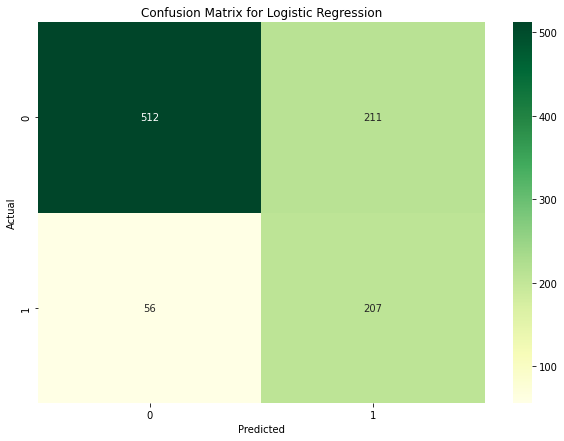

In [282]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Conclusion:** Model `Logistic Regression` yang telah dibangun menunjukan hasil yang optimal dengan akurasi (memprediksi pelanggan **Churn** secara keseluruhan) 73%. Model ini juga sudah cukup baik untuk mengurangi False Negative terlihat dari Confusion Matrix dimana **False Negative yang sangat kecil**

Yang signifikan adalah recall untuk Churn (0.79), menunjukkan bahwa model mampu mendeteksi sebagian besar pelanggan yang benar-benar akan churn. Ini penting untuk strategi retensi pelanggan, karena memungkinkan perusahaan untuk proaktif dalam mempertahankan pelanggan yang berisiko churn.

Secara keseluruhan, dengan recall nya yang tinggi model ini sudah cukup efektif untuk digunakan dalam upaya meretensi pelanggan dan mengurangi tingkat churn. Sehingga Perusahaan lebih efisien untuk fokus pada pelanggan yang beresiko tinggi untuk Churn.

### **ROC and Precision-Recall Curve**

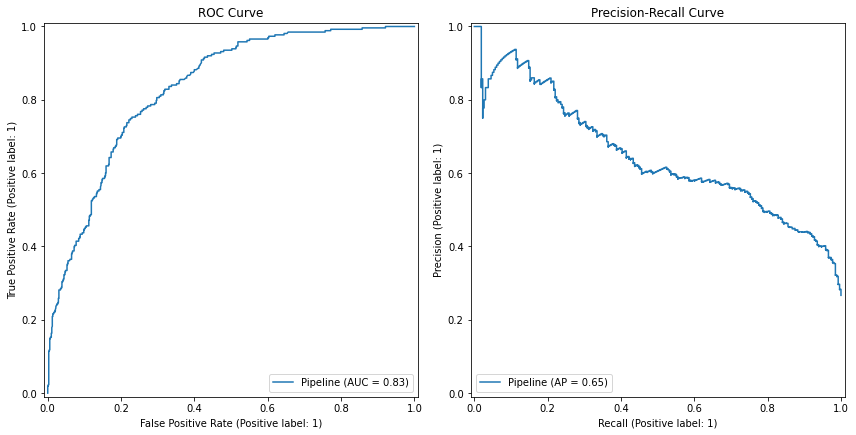

In [345]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(gscv.best_estimator_, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(gscv.best_estimator_, X_test, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

**Interpretasi ROC and Precision-Recall Curve:**

1. `ROC Curve dengan AUC 0.83`: Model ini cukup baik dalam membedakan antara pelanggan yang akan churn dan yang tidak. Dengan ini, model dapat digunakan dalam mengidentifikasi pelanggan yang berisiko tinggi Churn.

2. `Precision-Recall Curve dengan AP 0.65`: Model memiliki ketepatan yang moderat dalam memprediksi pelanggan yang akan churn. 

Secara keseluruhan, model ini memberikan prediksi yang cukup baik dalam tindakan retensi pelanggan.

## **Feature Importance**

In [290]:
# Define Logistic Regression and RandomUnderSampler
logreg = LogisticRegression(random_state=42)
rus = RandomUnderSampler(random_state=20)

# Create pipeline using imblearn
estimator = Pipeline([
    ('prep', transform),
    ('resample', rus),
    ('model', logreg)
])
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Evaluate
recall = recall_score(y_test, y_pred)

Recall Score sebelum Tuning: 0.7718631178707225


<Axes: title={'center': 'Feature Coefficients of the FINAL MODEL'}>

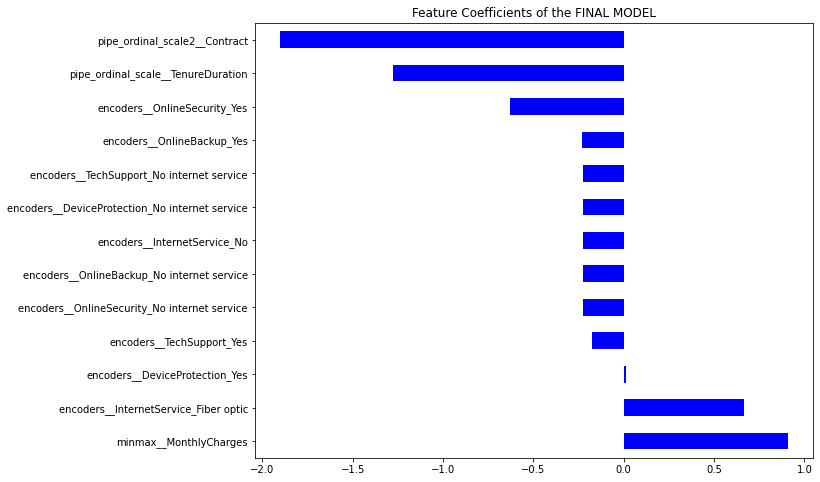

In [349]:
plt.figure(figsize=(10, 8))

coef = pd.Series(estimator['model'].coef_[0], transform.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='blue')

**Koefisien Feature Logistic Regression:**

Dari Feature Importance menunjukkan koefisien fitur model untuk Customer Churn, dengan tanda ***positif** menunjukkan peningkatan probabilitas Churn* dan tanda ***negatif** menunjukkan penurunan probabilitas churn.*

1. **Fitur dengan koefisien negatif besar**:

- `Contract`: Koefisien negatif besar menunjukkan bahwa tipe kontrak yang lebih panjang atau stabil cenderung menurunkan probabilitas churn. Pelanggan dengan kontrak yang lebih lama cenderung tetap bersama perusahaan.
- `TenureDuratio`n: Semakin lama durasi pelanggan menggunakan layanan, semakin kecil kemungkinan mereka untuk churn.

2. **Fitur dengan koefisien positif besar**:

- `MonthlyCharges`: Biaya bulanan yang lebih tinggi tampaknya meningkatkan probabilitas churn, menunjukkan bahwa pelanggan yang membayar lebih tinggi mungkin lebih cenderung meninggalkan layanan.
- `InternetService`: Pelanggan dengan layanan **fiber optic** mungkin lebih cenderung churn, mungkin karena ekspektasi yang lebih tinggi atau faktor lain.

3. **Fitur lain yang memiliki pengaruh**:

- `OnlineSecurity_Yes` dan `OnlineBackup_Yes`: Kedua fitur ini memiliki pengaruh negatif, menunjukkan bahwa pelanggan yang menggunakan layanan keamanan online dan backup online cenderung memiliki probabilitas churn yang lebih rendah.
- `TechSupport_Yes`: Pelanggan yang menggunakan layanan dukungan teknis juga cenderung memiliki probabilitas churn yang lebih rendah.
- Fitur-fitur seperti `No internet service` menunjukkan bahwa pelanggan yang tidak memiliki layanan internet mungkin lebih stabil (lebih kecil kemungkinan untuk churn) atau tidak relevan dalam konteks churn.


_____________________________________________________________________________________________

# **CONCLUSION 🧐**

- `Pelanggan Churn`: Model menunjukkan recall tinggi (`0.79`) dalam mendeteksi pelanggan yang akan churn, artinya model sangat efektif dalam mengidentifikasi sebagian besar pelanggan yang berpotensi churn, meskipun precision-nya rendah (`0.50`), yang menunjukkan bahwa ada cukup banyak false positives.

- `Pelanggan Tidak Churn`: Model memiliki precision tinggi (`0.90`) dalam mendeteksi pelanggan yang tidak akan churn, menunjukkan bahwa sebagian besar prediksi untuk tidak churn akurat. Namun, recall dengan (`0.71`) menunjukkan bahwa model menangkap cukup banyak pelanggan yang sebenarnya tidak churn, menyebabkan sejumlah false negatives tetapi kecil.


Model juga menunjukkan bahwa fitur seperti jenis kontrak (`Contract`), durasi berlangganan (`TenureDuration`), biaya bulanan (`MonthlyCharges`) dan penggunaan layanan tambahan seperti keamanan online (`OnlineSecurity`), dukungan teknis (`TechSupport`), dan pencadangan online (`OnlineBackup`) adalah indikator penting dalam menentukan apakah pelanggan akan churn. Pelanggan yang memiliki kontrak jangka panjang, durasi langganan yang lebih lama, dan menggunakan layanan tambahan cenderung lebih loyal, sedangkan biaya bulanan yang lebih tinggi dan beberapa jenis layanan internet dapat meningkatkan risiko churn.

# **RECOMMENDATION 💡**

- **Fokus pada Durasi `Contract`**: Pelanggan dengan kontrak bulanan lebih cenderung churn dibandingkan dengan pelanggan dengan kontrak jangka panjang (satu atau dua tahun). Oleh karena itu, perusahaan sebaiknya mendorong pelanggan untuk memilih kontrak jangka panjang dengan menawarkan layanan untuk kontrak langganan yang lebih lama (diskon, tambahan layanan) atau fitur khusus untuk kontrak tersebut.

- **Tingkatkan Upaya Retensi Berdasarkan `TenureDuration`**: Durasi lama pelanggan (TenureDuration/Tenure) berhubungan dengan tinggi rendahnya kemungkinan churn. Semakin lama maka semakin loyal. Maka, upaya retensi sebaiknya difokuskan pada pelanggan baru, misalnya dengan program loyalitas atau reward (poin) untuk mendorong mereka tetap tinggal lebih lama.

- **Evaluasi `InternetService`**: Dari proses EDA didapatkan bahwa pelanggan dengan layanan fiber optic lebih cenderung churn dibandingkan dengan pelanggan DSL. Perusahaan perlu menyelidiki alasan di balik ini, mungkin terkait kualitas atau harga layanan fiber optic. Dengan mendapatkan feedback dari pelanggan atau uji banding dengan kualitas kompetitor dapat mem-solve layanan ini.

- **Tingkatkan Layanan `OnlineSecurity` dan `TechSupport`**: Pelanggan tampaknya menghargai layanan keamanan online dan dukungan teknis. Peningkatan kualitas layanan di area ini dapat membantu mengurangi churn pelanggan.

- **Evaluasi `MonthlyCharges`**: Biaya bulanan (MonthlyCharges) memiliki pengaruh signifikan terhadap churn. Perusahaan perlu meninjau kembali struktur harga, dengan mempertimbangkan harga kompetitor di industri yang sama. Menawarkan paket dengan nilai tambah yang sesuai dengan harga dapat membantu mempertahankan pelanggan dan mencegah churn.